## Volume of purified water in treatment plants and water consumption by month in Tehran in the last 5 years

Water scarcity is a significant issue in the Middle East due to its arid climate and high population growth. Many countries in the region are considered to be among the most water-stressed in the world, with limited freshwater resources and high water demand levels.<br>Lack of water can also lead to food insecurity as farmers struggle to secure reliable water resources and suitable land for agriculture, and governments rely on importing the majority of the food from other water-rich countries outside the region. And much of the land available for producing food is becoming increasingly unusable due to desertification.<br>Iran is currently experiencing a major water crisis. ***Nineteen*** provinces are experiencing significant drought, with **Hormozgan**, Iran’s southernmost province, reporting a staggering **77 percent** decrease in average rainfall, followed by **Sistan and Baluchestan** in the southeast with a **72 percent** drop. Key water sources such as the **Shamil** and **Nian** dams in the Persian Gulf port of Bandar Abbas, **Esteghlal** dam near the city of Minab in Hormozgan province, and the **Zayandehrood** river, the largest in the central Iranian plateau, are also facing drastically reduced reserves.<br>

In this project, I aim to analyze water usage in **Tehran**, the capital of Iran, over the period from 2019 to 2023. This analysis will provide a comprehensive overview of water management practices in Iran. The key factors to be examined are:<br>
1. Monthly raw water volumes for each year

2. Monthly treated water volumes for each year

3. Water sales in Tehran

4. Water sales across the province

In [75]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Importing the Water Usage dataset
water_raw = pd.read_excel('Water.xls', sheet_name='Water')
water_raw.head(10)

,month,raw_water\n,treated_water,sales_tehran,sales_province,year
0,NaN,NaN,NaN,NaN,NaN,NaN
1,april,57012219.0,5.588782e+07,39862000.0,59658634.0,2019.0
2,may,67348085.0,6.621218e+07,86939241.0,120132292.0,2019.0
3,june,73515148.0,7.260117e+07,58759335.0,83840937.0,2019.0
4,july,76486450.0,7.581478e+07,75075508.0,103893472.0,2019.0
5,august,77814645.0,7.704510e+07,67334492.0,96069107.0,2019.0
6,september,76531281.0,7.588889e+07,81454743.0,107196262.0,2019.0
7,october,72832409.0,7.021674e+07,69597917.0,101379530.0,2019.0
8,november,71716886.0,6.564854e+07,63805738.0,89836920.0,2019.0
9,december,63412605.0,6.053584e+07,63702820.0,89411123.0,2019.0


In [77]:
# This data is pretty messy so i cleaned it up
water = water_raw.copy()
if water.iloc[0].isna().all():
    water = water.iloc[1:].reset_index(drop=True)
water.columns = [c.strip().replace("\n", "") for c in water.columns] # Clearing column names
water['year'] = water['year'].astype(int)
water.head()

,month,raw_water,treated_water,sales_tehran,sales_province,year
0,april,57012219.0,5.588782e+07,39862000.0,59658634.0,2019
1,may,67348085.0,6.621218e+07,86939241.0,120132292.0,2019
2,june,73515148.0,7.260117e+07,58759335.0,83840937.0,2019
3,july,76486450.0,7.581478e+07,75075508.0,103893472.0,2019
4,august,77814645.0,7.704510e+07,67334492.0,96069107.0,2019


The data is now clean to use. Have an overall look at the volume of raw and treated water in Tehran throughout the years:

## Trend Analysis
 evaluating the efficiency of resource management, and detecting signs of overuse or scarcity. In this section, we analyze the yearly changes in raw water intake, treated water production, and water sales in Tehran over the past years.

By visualizing these trends, we aim to answer key questions:

Has the overall water consumption increased or decreased over the years?

Are there noticeable drops or spikes in any particular year?

How closely do raw water, treated water, and water sales follow similar trends?

This analysis helps us determine whether Tehran's water usage patterns are sustainable and informs future planning for water resource management

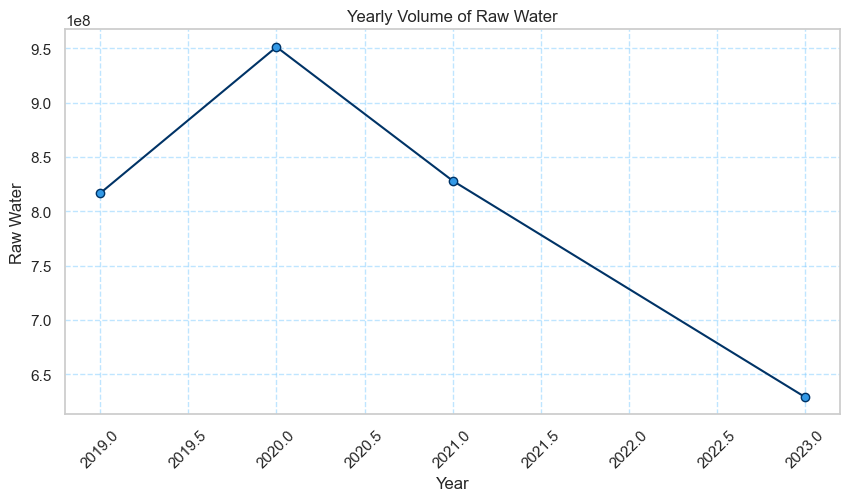

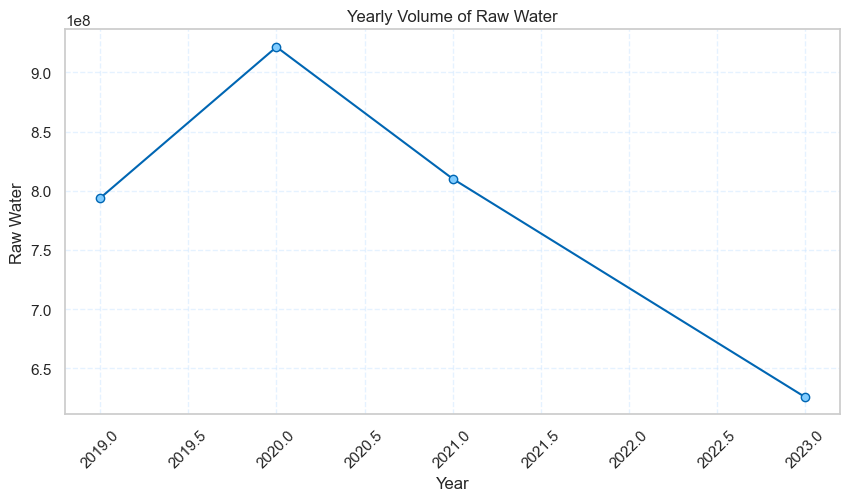

In [78]:
blue_palette = [
    (0.0, 0.2, 0.4),  # Deep navy blue
    (0.0, 0.4, 0.7),  # Strong blue
    (0.2, 0.6, 0.9),  # Sky blue
    (0.5, 0.8, 1.0),  # Light blue
    (0.8, 0.9, 1.0)   # Very pale blue
]
rawwater_yearly = water.groupby('year')['raw_water'].sum().reset_index()
treatedwater_yearly = water.groupby('year')['treated_water'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(rawwater_yearly['year'], rawwater_yearly['raw_water'], marker='o', markerfacecolor = blue_palette[2] ,color=blue_palette[0])
plt.grid(alpha=0.5, linestyle='--', color=blue_palette[3])
plt.title('Yearly Volume of Raw Water')
plt.xlabel('Year')
plt.ylabel('Raw Water')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(treatedwater_yearly['year'], treatedwater_yearly['treated_water'], marker='o', markerfacecolor = blue_palette[3] ,color=blue_palette[1])
plt.grid(alpha=0.5, linestyle='--', color=blue_palette[4])
plt.title('Yearly Volume of Raw Water')
plt.xlabel('Year')
plt.ylabel('Raw Water')
plt.xticks(rotation=45)
plt.show()

The maximum, minimum and mean of yearly raw water and trerated water are calculated below:

In [79]:
# Raw water
mean_raw = water['raw_water'].mean()
max_raw = water['raw_water'].max()
min_raw = water['raw_water'].min()
# Mean
print(f"Mean of Yearly Raw Water: {mean_raw / 1_000_000:.2f} Million Cubic Meters")
# Max
print(f"Maximum Yearly Raw Water: {max_raw / 1_000_000:.2f} Million Cubic Meters")
max_row = water[water['raw_water'] == max_raw]
print(max_row[['year', 'month', 'raw_water']])
# Min
print(f"Minimum Yearly Raw Water: {min_raw / 1_000_000:.2f} Million Cubic Meters")
min_row = water[water['raw_water'] == min_raw]
print(min_row[['year', 'month', 'raw_water']])
print('-----------------------------------------------------------')
# Treated Water
mean_treated = water['treated_water'].mean()
max_treated = water['treated_water'].max()
min_treated = water['treated_water'].min()
# Mean
print(f"Mean of Yearly Treated Water: {mean_treated / 1_000_000:.2f} Million Cubic Meters")
# Max
print(f"Maximum Yearly Treated Water: {max_treated / 1_000_000:.2f} Million Cubic Meters")
max_rowt = water[water['treated_water'] == max_treated]
print(max_rowt[['year', 'month', 'treated_water']])
# Min
print(f"Minimum Yearly Treated Water: {min_treated / 1_000_000:.2f} Million Cubic Meters")
min_rowt = water[water['treated_water'] == min_treated]
print(min_rowt[['year', 'month', 'treated_water']])

Mean of Yearly Raw Water: 67.19 Million Cubic Meters
Maximum Yearly Raw Water: 88.51 Million Cubic Meters
    year   month   raw_water
16  2020  august  88507434.0
Minimum Yearly Raw Water: 40.60 Million Cubic Meters
    year  month     raw_water
47  2023  march  4.059645e+07
-----------------------------------------------------------
Mean of Yearly Treated Water: 65.66 Million Cubic Meters
Maximum Yearly Treated Water: 87.53 Million Cubic Meters
    year month  treated_water
15  2020  july     87534408.0
Minimum Yearly Treated Water: 38.93 Million Cubic Meters
    year  month  treated_water
47  2023  march   3.892718e+07


The highly concerning drop from 1.8 to 1.3 million cubic meters in the period from 2020 onwards can be fully explained by drought, lack of rainfall and consumption management.<br>Why can drought cause this decline?

* **Shortage of raw water sources:** Dams and groundwater reservoirs have significantly decreased due to reduced rainfall and rising temperatures.
* **Consumption management and restrictions:** The Water and Wastewater Company might have implemented policies to reduce consumption (temporary cutoffs, rationing, or higher tariffs).
* **Increased public awareness:** After the water crisis in Iran, households and industries began reducing their usage (especially after 2021 when warnings became more serious).
* **Missing data for one year (1401):** There is a lack data for this year, so part of the drop might be due to incomplete averaging. However, even with this gap, a 0.5 million cubic meter decrease indicates a strong downward trend.


## Seasonal Analysis
 in water demand throughout each year. In cities like Tehran, factors such as temperature, precipitation, agricultural cycles, and residential habits contribute to variations in monthly water consumption.

In this section, we analyze how water usage changes across months to answer the following:

Which months have the highest or lowest water usage?

Is there a recurring seasonal pattern each year?

Are treated and raw water volumes more sensitive to seasonal changes?

By identifying these seasonal patterns, we can better anticipate peak demand periods, design smarter water distribution strategies, and raise awareness about water conservation during critical month

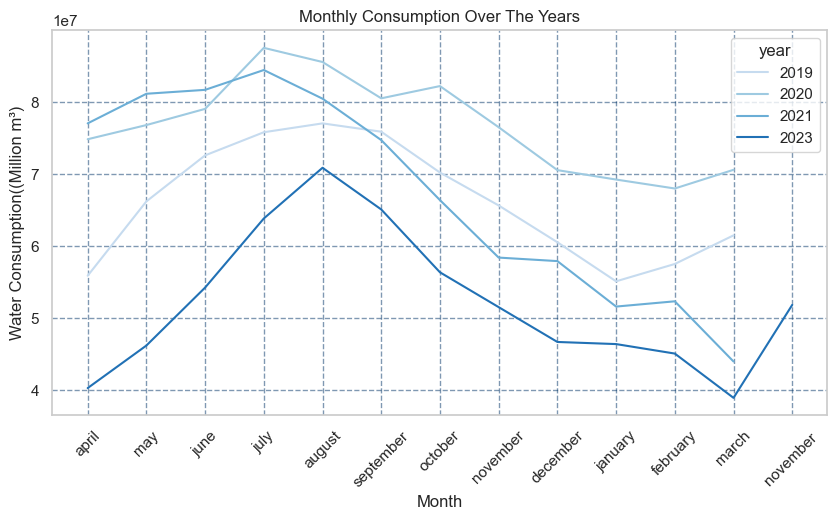

In [80]:
lineplotpalette = {
    2019: '#c6dbef',
    2020: '#9ecae1',
    2021: '#6baed6', 
    2023: '#2171b5'   
}
plt.figure(figsize=(10,5))
sns.lineplot(data=water, x='month', y='treated_water', hue='year', palette=lineplotpalette)
plt.grid(linestyle='--', color=blue_palette[0], alpha=0.5)
plt.xticks(rotation=45)
plt.title("Monthly Consumption Over The Years")
plt.xlabel("Month")
plt.ylabel('Water Consumption((Million m³)')
plt.show()

The line plot indicates a strong seasonal pattern in Tehran's water consumption. Across all years (2019–2023), water usage consistently peaks during the summer months—especially in July and August—and declines in the winter months like February and March. This trend suggests higher demand for water during hot months, likely due to increased usage for cooling, agriculture, and personal needs. Additionally, a downward trend in overall consumption is noticeable in 2023, especially in comparison to previous years. This could imply improved water conservation efforts, policy changes, or possibly reduced population activity. But in this case it is worth mentioning that if water resources decrease (e.g., reduced rainfall, drought, depletion of dam reserves), water supply is limited and as a result, water consumption decreases. The downward trend is most likely due to a  water crisis.<br>Tehran's major dams are currently at critically low levels, with an average of just 15% of their total capacity filled. The dams supplying water to the city, including Latyan, Mamloo, Lar, Taleqan, and Karaj, are experiencing severe depletion. Specifically, Lar Dam is at 7%, and Mamloo Dam is at 14% capacity, according to [PishtazNews](https://pishtaznews.com/en_GB/articles/gc3/features/2025/03/29/feature-01) and [IranWire](https://iranwire.com/en/news/141441-tehran-dam-water-level-drops-to-15-of-capacity/).<br> **A more detailed breakdown:**<br>
* Lar Dam: Holding less than 10% of its capacity, which is about 960 million cubic meters. 
* Latyan Dam: Operating at about 10% of its 95 million cubic meter capacity. 
* Mamloo Dam: At 15% capacity, holding 37.5 million cubic meters, a significant drop from its peak of 250 million in 2015. 
* Karaj Dam: At 8% of its total capacity, marking a 56% decline compared to the same period last year. 
* Taleqan Dam: While relatively better, it is still only 53% ful

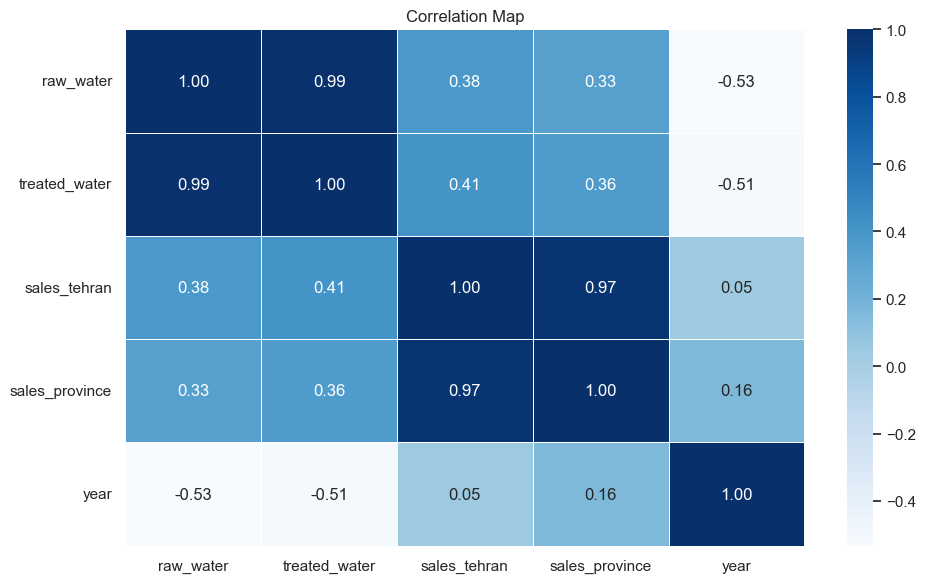

In [81]:
corr_water = water.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_water, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Map')
plt.tight_layout()
plt.show()

#### Key observations from the heatmap
* Raw Water & Treated Water = 1.00 <br>
Treated water is highly dependent on raw water availability — expected in water systems, since raw water is the input.
* Raw Water & Water Sale = 0.38 <br>
This could indicate some losses in the system (e.g. leakage, evaporation), or seasonal usage behavior (e.g. more raw water in agriculture, not for sale).
* Treated Water and Year = 0.51 <br>
The correlation between Treated Water and Year is approximately -0.5, indicating a moderate downward trend in treated water usage over the observed years. Which is the result of decades of mismanagement

Text(0, 0.5, 'Percentage of Raw Water Converted to Treated Water')

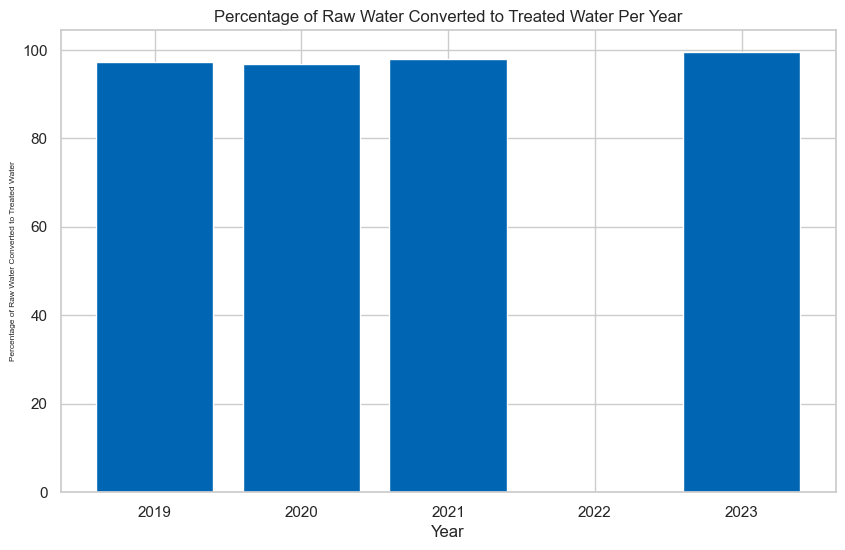

In [82]:
yearly_raw = water.groupby('year')['raw_water'].sum()
yearly_treated = water.groupby('year')['treated_water'].sum()
conversion_rate = (yearly_treated/yearly_raw)*100
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
plt.bar(conversion_rate.index, conversion_rate.values, color=blue_palette[1])
plt.title("Percentage of Raw Water Converted to Treated Water Per Year")
plt.xlabel('Year')
plt.ylabel('Percentage of Raw Water Converted to Treated Water', fontsize=6)

In the bar plot above you can see the percentage of raw water converted to treated water.

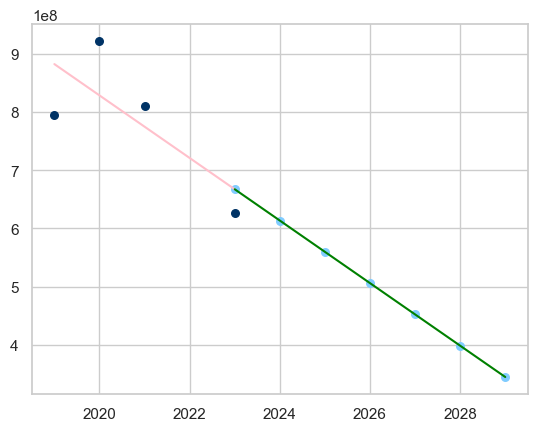

In [87]:
water['year'] = pd.to_datetime(water['year'], format='%Y')
water_pivot = pd.pivot_table(water, values='treated_water', index='year', aggfunc='sum').reset_index()
from sklearn.linear_model import LinearRegression
X = water_pivot['year'].dt.year.values.reshape(-1, 1)
y = water_pivot['treated_water']
reg = LinearRegression().fit(X, y)
new_year = np.array(range(2023, 2030)).reshape(-1,1)
new_water = reg.predict(new_year)
plt.scatter(X, y, color=blue_palette[0], s=30)
plt.plot(X, reg.predict(X), color='pink')
plt.scatter(new_year, new_water, color=blue_palette[3], s=30)
plt.plot(new_year, new_water, color='green')
plt.show()